<a href="https://colab.research.google.com/github/Daniel2291/SFCNN/blob/main/ToyProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

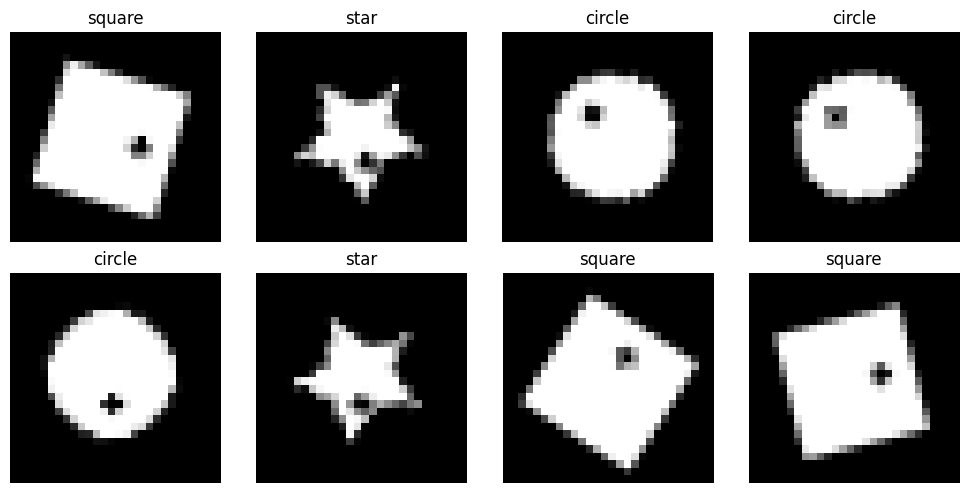

In [ ]:

import numpy as np
from PIL import Image, ImageDraw
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import random

def draw_shape(shape_type, image_size=28, shape_size=16, angle=0):
    img = Image.new('L', (image_size, image_size), 0)     # black background
    shape_layer = Image.new('L', (image_size, image_size), 0)
    draw = ImageDraw.Draw(shape_layer)

    cx, cy = image_size // 2, image_size // 2
    r = shape_size // 2

    if shape_type == 'circle':
        bbox = [cx - r, cy - r, cx + r, cy + r]
        draw.ellipse(bbox, fill=255)

    elif shape_type == 'square':
        bbox = [cx - r, cy - r, cx + r, cy + r]
        draw.rectangle(bbox, fill=255)

    elif shape_type == 'triangle':
        points = [(cx, cy - r), (cx - r, cy + r), (cx + r, cy + r)]
        draw.polygon(points, fill=255)

    elif shape_type == 'star':
        points = []
        for i in range(5):
            outer_angle = i * (2 * np.pi / 5)
            inner_angle = outer_angle + np.pi / 5
            points.append((cx + r * np.cos(outer_angle), cy + r * np.sin(outer_angle)))
            points.append((cx + r * 0.5 * np.cos(inner_angle), cy + r * 0.5 * np.sin(inner_angle)))
        draw.polygon(points, fill=255)

    # Add small black dot marker inside shape
    marker_radius = 1
    marker_offset = 0.5 * r
    marker_x = cx
    marker_y = cy - marker_offset  # top-center inside shape

    draw.ellipse([marker_x - marker_radius, marker_y - marker_radius,
                  marker_x + marker_radius, marker_y + marker_radius], fill=0)  # black dot

    # Rotate the whole shape layer
    rotated = shape_layer.rotate(angle, resample=Image.BILINEAR)

    return np.array(rotated)



class ShapeDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.shapes = ['triangle', 'square', 'circle', 'star']
        self.data, self.labels = [], []
        for _ in range(num_samples):
            label = random.randint(0, 3)
            angle = random.uniform(0, 360)
            img = draw_shape(self.shapes[label], angle=angle)
            self.data.append(img)
            self.labels.append(label)

    def __getitem__(self, idx):
        img = torch.tensor(self.data[idx], dtype=torch.float32).unsqueeze(0) / 255.0
        return img, self.labels[idx]

    def __len__(self):
        return len(self.data)



  # Visualize samples
dataset = ShapeDataset(num_samples=8)
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    img, label = dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(dataset.shapes[label])
    ax.axis('off')
plt.tight_layout()
plt.show()
